In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
X,y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

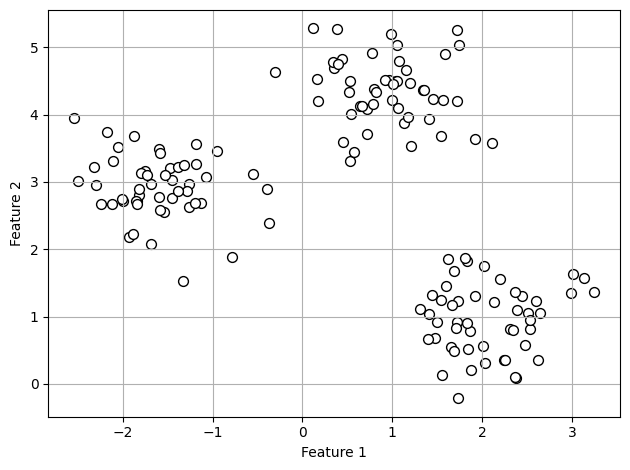

In [3]:
plt.scatter(X[:,0],
            X[:,1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
distortion = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortion.append(km.inertia_)

In [6]:
distortion

[713.6998289434158,
 283.4610178020931,
 72.47601670996696,
 62.87762507747094,
 54.265024736196764,
 47.53131012250911,
 39.81079365633066,
 35.43967265728274,
 30.76354507878706,
 28.066540860145892]

In [7]:
print(f'distortion: {km.inertia_:.2f}')

distortion: 28.07


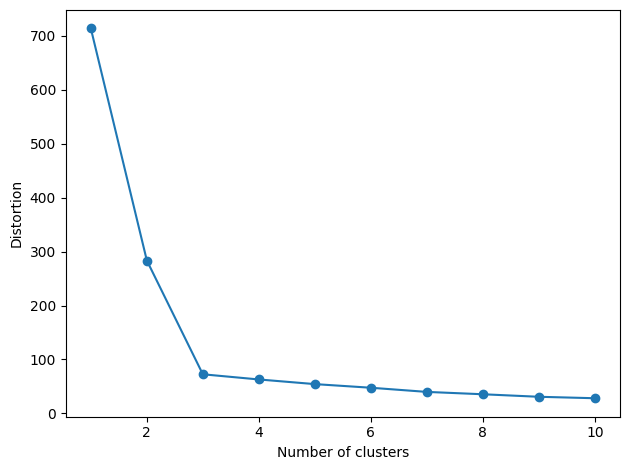

In [8]:
plt.plot(range(1,11),distortion,marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [9]:
km = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(X)

In [15]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

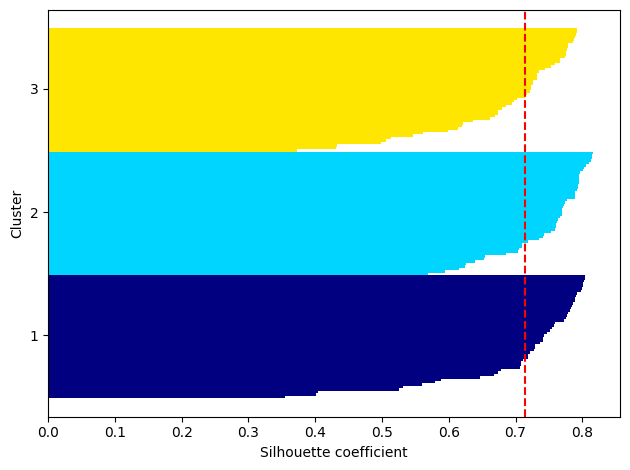

In [16]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower,y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks,cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

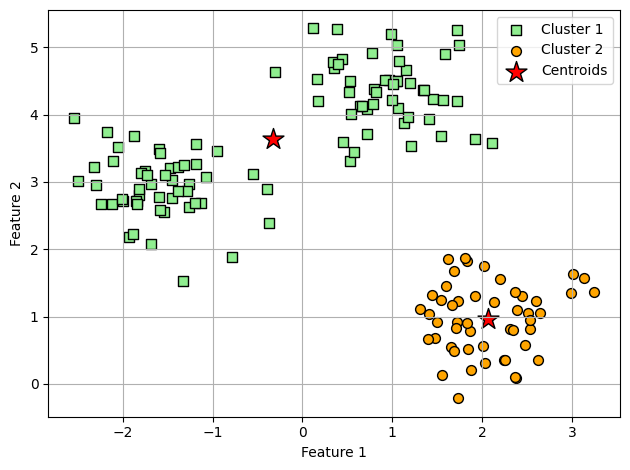

In [19]:
km = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(X)

plt.scatter(
    X[y_km ==0,0],
    X[y_km ==0,1],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='Cluster 1'
)
plt.scatter(
    X[y_km ==1,0],
    X[y_km ==1,1],
    s=50,
    c='orange',
    marker='o',
    edgecolor='black',
    label='Cluster 2'
)
# plt.scatter(
#     X[y_km ==2,0],
#     X[y_km ==2,1],
#     s=50,
#     c='lightblue',
#     marker='v',
#     edgecolor='black',
#     label='Cluster 3'
# )
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    s=250,
    marker='*',
    c='red',
    edgecolor='black',
    label='Centroids'
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

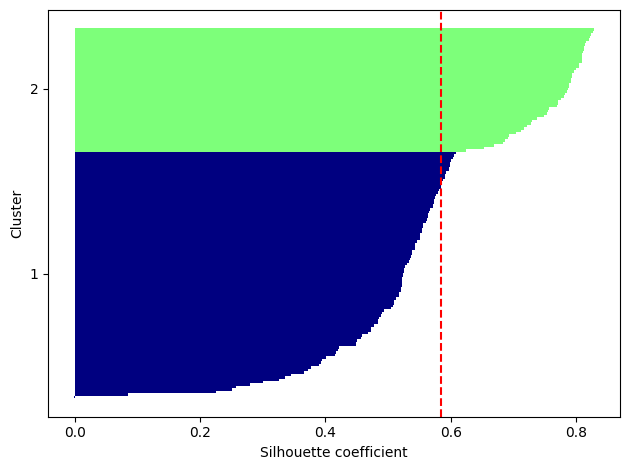

In [20]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower,y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks,cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

### Alternative approach prototype based clustering - Hierachical Clustering